# Nicole Johnson

![](istockphoto-1481851560-612x612.jpg)

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from cleaning import clean_data

In [2]:
df = pd.read_csv("data/_select_kchd_kchs_date_kchs_price_from_king_county_house_details_202512091053.csv")

In [3]:
df = clean_data(df)

In [4]:
df["distance_miles"] = df.apply(
    lambda r: geodesic(
        (r["lat"], r["long"]),   # ✅ row values
        (47.604, -122.334)
    ).miles,
    axis=1
)

In [5]:
df.shape

(21597, 22)

In [6]:
df.isna().sum()

id                0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
date              0
price             0
distance_miles    0
dtype: int64

In [7]:
df.dtypes

id                         int64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                     int64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
date              datetime64[ns]
price                      int64
distance_miles           float64
dtype: object

In [8]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,distance_miles
0,7129300520,3,1.00,1180,5650,1,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13,221900,7.353145
1,6414100192,3,2.25,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,538000,8.113367
2,5631500400,2,1.00,770,10000,1,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25,180000,10.382107
3,2487200875,4,3.00,1960,5000,1,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09,604000,6.375708
4,1954400510,3,2.00,1680,8080,1,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18,510000,13.530449


In [9]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,distance_miles
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597,2.159700e+04,21597.000000
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.445988,0.006760,0.233181,3.409825,7.657915,...,1970.999676,68.758207,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,2014-10-29 04:20:38.171968512,5.402966e+05,11.498204
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014-05-02 00:00:00,7.800000e+04,0.704958
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014-07-22 00:00:00,3.220000e+05,6.136454
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014-10-16 00:00:00,4.500000e+05,10.340491
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015-02-17 00:00:00,6.450000e+05,15.736697
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015-05-27 00:00:00,7.700000e+06,48.154146
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.551658,0.081944,0.764673,0.650546,1.173200,...,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,NaN,3.673681e+05,6.586346


In [10]:
df['month'] = df['date'].dt.month
df['price_per_sqft'] = df['price']/df['sqft_living']

In [11]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,distance_miles,month,price_per_sqft
0,7129300520,3,1.00,1180,5650,1,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014-10-13,221900,7.353145,10,188.050847
1,6414100192,3,2.25,2570,7242,2,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014-12-09,538000,8.113367,12,209.338521
2,5631500400,2,1.00,770,10000,1,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015-02-25,180000,10.382107,2,233.766234
3,2487200875,4,3.00,1960,5000,1,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014-12-09,604000,6.375708,12,308.163265
4,1954400510,3,2.00,1680,8080,1,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015-02-18,510000,13.530449,2,303.571429


In [12]:
monthly_median = df[(df['price'] > 400000) & (df['price'] < 500000) & (df['distance_miles'] <= 5)] \
                    .groupby('month')['price_per_sqft'].median()

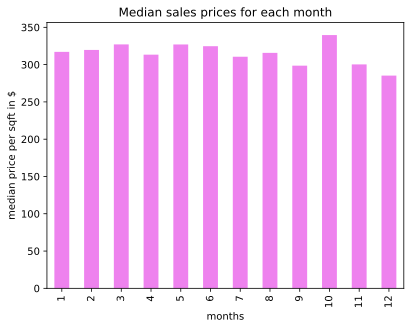

In [13]:
monthly_median.plot(kind='bar', color = 'violet')      # or series.plot.bar()
plt.ylabel("median price per sqft in $")
plt.xlabel("months")
plt.title("Median sales prices for each month")
plt.show()

In [14]:
df['is_new_or_renovated'] = (df['yr_built'] > 2005) | (df['yr_renovated'] > 2005)

In [15]:
if_renovated_median_price = df[(df['bedrooms'] > 2) & (df['price'] > 400000) & (df['price'] < 500000) & (df['distance_miles'] <= 5)] \
                    .groupby('is_new_or_renovated')['price'].median()

In [16]:
if_renovated_median_price

is_new_or_renovated
False    450000.0
True     455000.0
Name: price, dtype: float64

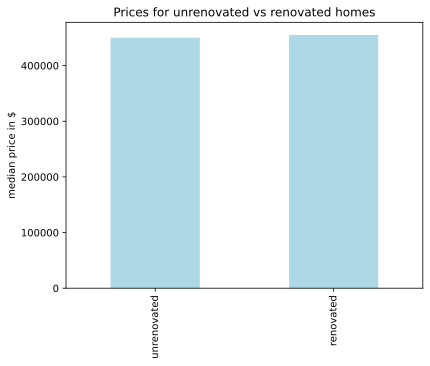

In [17]:
# Plot the bar chart
ax = if_renovated_median_price.plot(kind='bar', color='lightblue')

# Set x-axis labels
ax.set_xticks([0, 1])                      # positions of the bars
ax.set_xticklabels(['unrenovated', 'renovated'])
ax.set_xlabel('')  # or None

# Labels and title
plt.ylabel("median price in $")
plt.title("Prices for unrenovated vs renovated homes")

plt.show()

In [18]:
zip_codes_counts = df[
    (df['bedrooms'] > 2) &
    (df['price'] > 400000) &
    (df['price'] < 500000) &
    (df['distance_miles'] <= 5)
].groupby('zipcode')['zipcode'].count().sort_values(ascending=False)

In [19]:
zip_codes_counts

zipcode
98144    53
98118    44
98116    42
98122    39
98126    38
98108    37
98199    23
98136    22
98103    20
98107    18
98106    16
98119    11
98105     8
98109     4
98115     3
98112     2
98102     1
Name: zipcode, dtype: int64